In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
import itertools
import statsmodels.api as sm

# Linear Regression

In [23]:
df = pd.read_csv("RFLData.csv")
df.shape

/var/folders/k1/l4fpqgbn5hq_02pxbp2s7zkh0000gn/T/ipykernel_35909/2706743201.py:1: DtypeWarning: Columns (12,13,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("RFLData.csv")


(111041, 18)

In [24]:
for columns in df.columns:
    if "Unnamed" in columns:
        df.drop(columns, axis=1, inplace=True)
df.describe()

,RFL_Att,Temperature,Relative Humidity,Visibility,Temperature Difference,Absolute Humidity,Time,Frequency,Distance,Rain Intensity,SYNOP Code
count,111041.000000,111041.000000,111041.000000,111041.000000,111041.000000,111041.000000,111041.000000,1.110410e+05,111041.000000,111041.000000,111041.000000
mean,12.081390,12.916485,78.788240,29580.656942,-0.108868,10.146837,11.244324,7.850797e+10,3348.651709,0.530645,2.647518
std,4.089316,9.505956,17.514275,24892.579354,0.840872,6.162120,7.000356,5.000016e+09,1208.521498,3.244773,2.935448
min,-0.085651,-6.915637,8.898742,11.181315,-11.157000,1.069317,0.000000,7.350000e+10,2012.000061,0.000000,0.000000
25%,10.794584,4.506938,70.171059,8189.281266,-0.425000,5.080780,5.000000,7.350000e+10,2020.893485,0.000000,0.000000
50%,11.920892,11.060456,83.318654,21737.387580,-0.100000,7.272890,11.000000,8.350000e+10,2961.074365,0.000000,0.000000
75%,13.399258,22.500517,92.286500,47915.829960,0.230000,16.604670,17.000000,8.350000e+10,4820.945766,0.119594,6.000000
max,48.392563,36.734515,99.499857,75004.999240,13.630000,24.985184,23.000000,8.350000e+10,4827.999868,131.801891,8.000000


Convert the factor variable into dummy variables

In [25]:
synop_onehot = pd.get_dummies(df["SYNOP Code"], prefix = "SYNOP")
df = pd.concat([df, synop_onehot], axis=1)
df = df.drop("SYNOP Code", axis=1)
df.head()

,RFL_Att,Temperature,Relative Humidity,Visibility,Temperature Difference,Absolute Humidity,Time,Frequency,Distance,Rain Intensity,SYNOP_0,SYNOP_3,SYNOP_4,SYNOP_5,SYNOP_6,SYNOP_7,SYNOP_8
0,4.941875,26.134005,71.820618,66784.84434,13.63,17.672484,9,73500000000,2114.405171,0.0,1,0,0,0,0,0,0
1,4.328734,25.587852,72.885521,71044.74326,-0.54,17.470850,9,73500000000,2121.637684,0.0,1,0,0,0,0,0,0
2,4.356399,25.689856,72.436011,51668.60394,-0.24,17.265145,10,73500000000,2112.868600,0.0,1,0,0,0,0,0,0
3,4.340440,25.566924,70.817439,50124.79678,-0.16,16.873409,10,73500000000,2115.440881,0.0,1,0,0,0,0,0,0
4,4.322831,25.628090,71.206569,58443.34520,-0.10,16.820267,10,73500000000,2115.840072,0.0,1,0,0,0,0,0,0


In [26]:
df.isna().sum()

RFL_Att                   0
Temperature               0
Relative Humidity         0
Visibility                0
Temperature Difference    0
Absolute Humidity         0
Time                      0
Frequency                 0
Distance                  0
Rain Intensity            0
SYNOP_0                   0
SYNOP_3                   0
SYNOP_4                   0
SYNOP_5                   0
SYNOP_6                   0
SYNOP_7                   0
SYNOP_8                   0
dtype: int64

In [27]:
df.describe()

,RFL_Att,Temperature,Relative Humidity,Visibility,Temperature Difference,Absolute Humidity,Time,Frequency,Distance,Rain Intensity,SYNOP_0,SYNOP_3,SYNOP_4,SYNOP_5,SYNOP_6,SYNOP_7,SYNOP_8
count,111041.000000,111041.000000,111041.000000,111041.000000,111041.000000,111041.000000,111041.000000,1.110410e+05,111041.000000,111041.000000,111041.000000,111041.000000,111041.000000,111041.000000,111041.000000,111041.000000,111041.000000
mean,12.081390,12.916485,78.788240,29580.656942,-0.108868,10.146837,11.244324,7.850797e+10,3348.651709,0.530645,0.537792,0.032682,0.006592,0.071865,0.316532,0.011707,0.022829
std,4.089316,9.505956,17.514275,24892.579354,0.840872,6.162120,7.000356,5.000016e+09,1208.521498,3.244773,0.498572,0.177803,0.080924,0.258266,0.465125,0.107566,0.149360
min,-0.085651,-6.915637,8.898742,11.181315,-11.157000,1.069317,0.000000,7.350000e+10,2012.000061,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.794584,4.506938,70.171059,8189.281266,-0.425000,5.080780,5.000000,7.350000e+10,2020.893485,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.920892,11.060456,83.318654,21737.387580,-0.100000,7.272890,11.000000,8.350000e+10,2961.074365,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,13.399258,22.500517,92.286500,47915.829960,0.230000,16.604670,17.000000,8.350000e+10,4820.945766,0.119594,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,48.392563,36.734515,99.499857,75004.999240,13.630000,24.985184,23.000000,8.350000e+10,4827.999868,131.801891,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


check for outliers and distribution

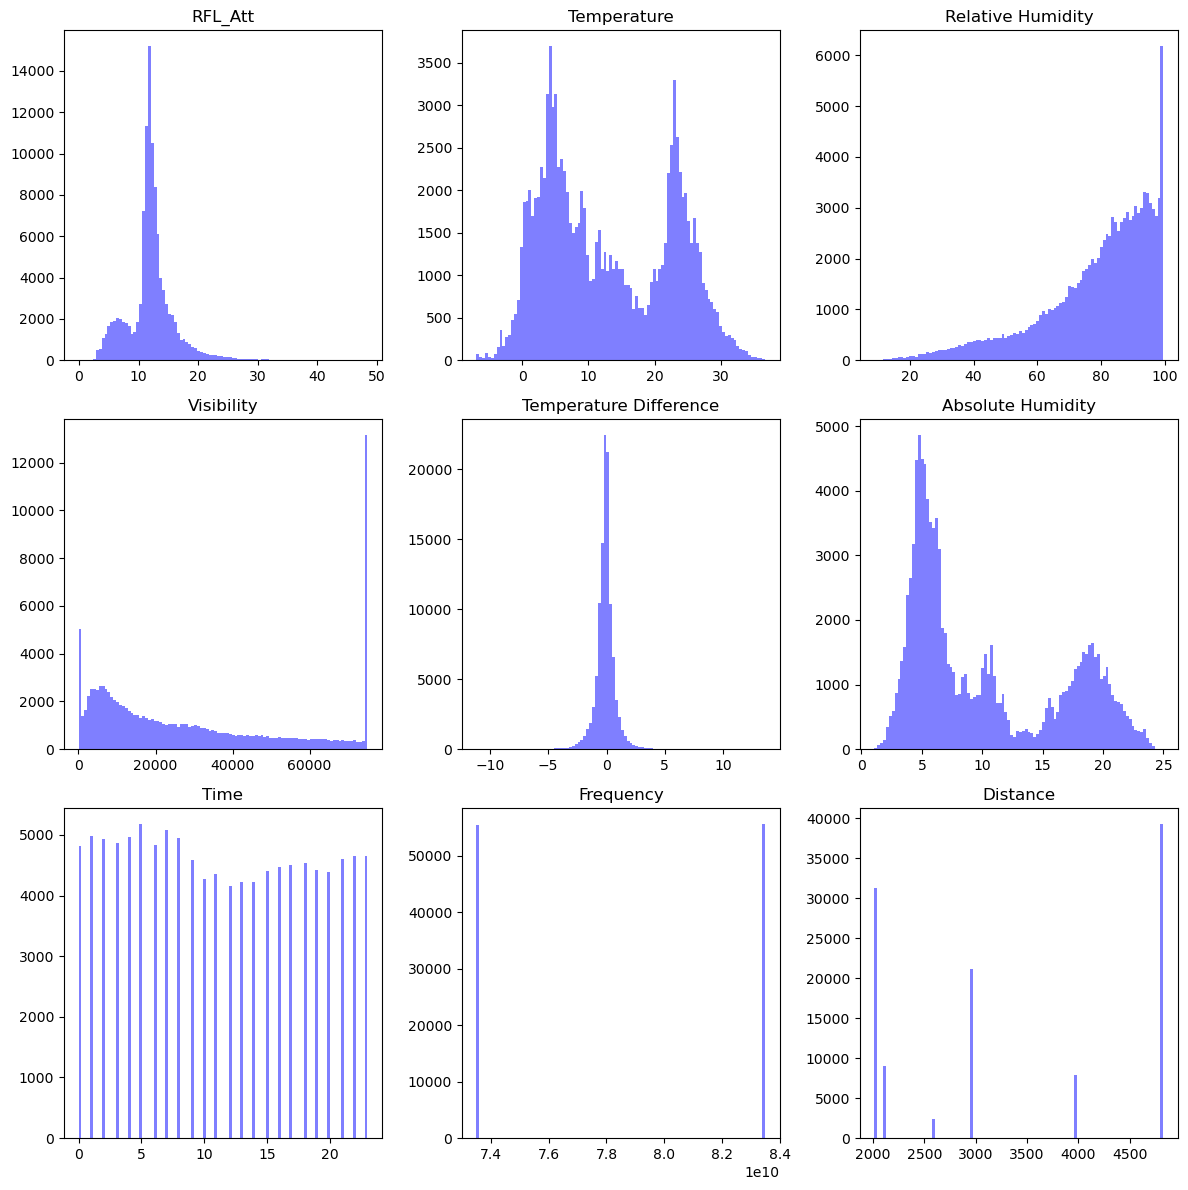

In [28]:
# for col in df.columns:
#     if ("SYNOP" not in col) and ("Time" not in col):
#         sns.histplot(x = df[col])
#         plt.show()

non_categorical_columns = [col for col in df.columns if ("SYNOP" not in col)]
df_non_categorical = df[non_categorical_columns]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.hist(df_non_categorical.iloc[:, i], bins=100, alpha=0.5, color='b')
    ax.set_title(df_non_categorical.columns[i])

fig.tight_layout()

plt.show()

In [29]:
df['Frequency'] = df['Frequency'] / 10000000000

In [30]:
df.head()

,RFL_Att,Temperature,Relative Humidity,Visibility,Temperature Difference,Absolute Humidity,Time,Frequency,Distance,Rain Intensity,SYNOP_0,SYNOP_3,SYNOP_4,SYNOP_5,SYNOP_6,SYNOP_7,SYNOP_8
0,4.941875,26.134005,71.820618,66784.84434,13.63,17.672484,9,7.35,2114.405171,0.0,1,0,0,0,0,0,0
1,4.328734,25.587852,72.885521,71044.74326,-0.54,17.470850,9,7.35,2121.637684,0.0,1,0,0,0,0,0,0
2,4.356399,25.689856,72.436011,51668.60394,-0.24,17.265145,10,7.35,2112.868600,0.0,1,0,0,0,0,0,0
3,4.340440,25.566924,70.817439,50124.79678,-0.16,16.873409,10,7.35,2115.440881,0.0,1,0,0,0,0,0,0
4,4.322831,25.628090,71.206569,58443.34520,-0.10,16.820267,10,7.35,2115.840072,0.0,1,0,0,0,0,0,0


Set up a baseline linear regression model

In [31]:

# Initialize the LinearRegression model
regressor = LinearRegression()

# Create the linear regression pipeline
# lr_pipe = Pipeline([("standard scaler", StandardScaler()), 
#                  ("regressor", regressor)])

lr_pipe = Pipeline([("regressor", regressor)])

train_set, test_set = train_test_split(df, test_size = 0.8, random_state = 42)

X_train = train_set.drop("RFL_Att", axis=1)
y_train = train_set["RFL_Att"]

X_test = test_set.drop("RFL_Att", axis=1)
y_test = test_set["RFL_Att"]


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)



(22208, 16) (22208,)
(88833, 16) (88833,)


In [32]:
lr_pipe.fit(X_train, y_train)
y_pred = lr_pipe.predict(X_test)
print(y_pred.shape)

# def pred_vs_actual(y_pred, y_test):
#     plt.figure(figsize=(10, 5))
#     plt.plot(np.linspace(1, 22208, num = 22208),y_pred, label="Predicted")
#     plt.plot(np.linspace(1, 22208, num = 22208),y_test, label="Actual")
#     plt.legend()
#     plt.show()
    
# def residual_plot(y_pred, y_test):
#     plt.scatter(y_pred, y_pred - y_test, c = "blue", marker = "s", label = "Training data")
#     plt.xlabel("Predicted values")
#     plt.ylabel("Residuals")
#     plt.show()
    
# def qq_plot(y_pred, y_test):
#     sm.qqplot(y_pred - y_test, line='45')
#     plt.show()

def print_equation(model, X_train = X_train):
    print("y = ", end="")
    for i in range(len(model.coef_)):
        if model.coef_[i] != 0:
            print(f"{model.coef_[i]} * {X_train.columns[i]} + ", end="")
    print(f"{model.intercept_}")
# pred_vs_actual(y_pred, y_test)
print("MSE train:", mean_squared_error(y_train, lr_pipe.predict(X_train)))
print("MSE test:", mean_squared_error(y_test, y_pred))
print("R2 train:", r2_score(y_train, lr_pipe.predict(X_train)))
print("R2 test:", r2_score(y_test, y_pred))
# residual_plot(y_pred, y_test)
# qq_plot(y_pred, y_test)
print_equation(lr_pipe["regressor"], X_train)

(88833,)
MSE train: 7.4326339288434395
MSE test: 7.504501448285052
R2 train: 0.5558094950061939
R2 test: 0.5511578766987991
y = 0.12635773645226572 * Temperature + 0.021856317422617393 * Relative Humidity + -4.3491675667247515e-05 * Visibility + -0.21719367212300597 * Temperature Difference + -0.4198602289115229 * Absolute Humidity + -0.02717869543503227 * Time + 0.0469075136325423 * Frequency + 0.0005280378781123488 * Distance + 0.5545704595365684 * Rain Intensity + -0.8926388062179862 * SYNOP_0 + -0.18354201710235454 * SYNOP_3 + -0.7963465214323633 * SYNOP_4 + -0.038551060669560884 * SYNOP_5 + 2.0705192950512408 * SYNOP_6 + -1.3555450789085928 * SYNOP_7 + 1.1961041892796163 * SYNOP_8 + 11.969641281977648


# Linear Regression with Interaction

Now we try to use the linear regression with interaction model

In [33]:
print(df.columns)

Index(['RFL_Att', 'Temperature', 'Relative Humidity', 'Visibility',
       'Temperature Difference', 'Absolute Humidity', 'Time', 'Frequency',
       'Distance', 'Rain Intensity', 'SYNOP_0', 'SYNOP_3', 'SYNOP_4',
       'SYNOP_5', 'SYNOP_6', 'SYNOP_7', 'SYNOP_8'],
      dtype='object')


In [34]:
df2 = df.copy()
categorical_columns = []
for col in df2.columns:
    if ("SYNOP" in col) or ("Time" in col):
        categorical_columns.append(col)
print(categorical_columns)

['Time', 'SYNOP_0', 'SYNOP_3', 'SYNOP_4', 'SYNOP_5', 'SYNOP_6', 'SYNOP_7', 'SYNOP_8']


In [35]:
feature_columns = df2.columns.drop(categorical_columns + ['RFL_Att'])

combinaisons = list(itertools.combinations(feature_columns, 2))

print(combinaisons)

[('Temperature', 'Relative Humidity'), ('Temperature', 'Visibility'), ('Temperature', 'Temperature Difference'), ('Temperature', 'Absolute Humidity'), ('Temperature', 'Frequency'), ('Temperature', 'Distance'), ('Temperature', 'Rain Intensity'), ('Relative Humidity', 'Visibility'), ('Relative Humidity', 'Temperature Difference'), ('Relative Humidity', 'Absolute Humidity'), ('Relative Humidity', 'Frequency'), ('Relative Humidity', 'Distance'), ('Relative Humidity', 'Rain Intensity'), ('Visibility', 'Temperature Difference'), ('Visibility', 'Absolute Humidity'), ('Visibility', 'Frequency'), ('Visibility', 'Distance'), ('Visibility', 'Rain Intensity'), ('Temperature Difference', 'Absolute Humidity'), ('Temperature Difference', 'Frequency'), ('Temperature Difference', 'Distance'), ('Temperature Difference', 'Rain Intensity'), ('Absolute Humidity', 'Frequency'), ('Absolute Humidity', 'Distance'), ('Absolute Humidity', 'Rain Intensity'), ('Frequency', 'Distance'), ('Frequency', 'Rain Intensit

In [36]:
for a, b in combinaisons:
    df2["{a} * {b}".format(a = a, b = b)] = df2[a] * df2[b]
    
for col in feature_columns:
    df2["{}^2".format(col)] = df2[col] ** 2

for col in feature_columns:
    for cat in categorical_columns:
        df2["{} * {}".format(col, cat)] = df2[col] * df2[cat]

/var/folders/k1/l4fpqgbn5hq_02pxbp2s7zkh0000gn/T/ipykernel_35909/969468362.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2["{} * {}".format(col, cat)] = df2[col] * df2[cat]
/var/folders/k1/l4fpqgbn5hq_02pxbp2s7zkh0000gn/T/ipykernel_35909/969468362.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2["{} * {}".format(col, cat)] = df2[col] * df2[cat]
/var/folders/k1/l4fpqgbn5hq_02pxbp2s7zkh0000gn/T/ipykernel_35909/969468362.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

In [37]:
df2.columns

Index(['RFL_Att', 'Temperature', 'Relative Humidity', 'Visibility',
       'Temperature Difference', 'Absolute Humidity', 'Time', 'Frequency',
       'Distance', 'Rain Intensity',
       ...
       'Distance * SYNOP_7', 'Distance * SYNOP_8', 'Rain Intensity * Time',
       'Rain Intensity * SYNOP_0', 'Rain Intensity * SYNOP_3',
       'Rain Intensity * SYNOP_4', 'Rain Intensity * SYNOP_5',
       'Rain Intensity * SYNOP_6', 'Rain Intensity * SYNOP_7',
       'Rain Intensity * SYNOP_8'],
      dtype='object', length=117)

In [38]:
train_set, test_set = train_test_split(df2, test_size = 0.4, random_state = 42)

X_train = train_set.drop("RFL_Att", axis=1)
y_train = train_set["RFL_Att"]

X_test = test_set.drop("RFL_Att", axis=1)
y_test = test_set["RFL_Att"]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(66624, 116) (66624,)
(44417, 116) (44417,)


In [39]:
X_train.head()

,Temperature,Relative Humidity,Visibility,Temperature Difference,Absolute Humidity,Time,Frequency,Distance,Rain Intensity,SYNOP_0,...,Distance * SYNOP_7,Distance * SYNOP_8,Rain Intensity * Time,Rain Intensity * SYNOP_0,Rain Intensity * SYNOP_3,Rain Intensity * SYNOP_4,Rain Intensity * SYNOP_5,Rain Intensity * SYNOP_6,Rain Intensity * SYNOP_7,Rain Intensity * SYNOP_8
31424,11.501101,99.053511,6357.345497,-0.100,10.202052,15,8.35,2014.753055,0.97127,0,...,0.0,0.0,14.569056,0.0,0.0,0.0,0.0,0.97127,0.0,0.0
5106,28.691852,71.722922,14212.883600,1.870,20.213559,3,8.35,2120.788402,0.00000,1,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
75845,4.985198,80.705217,44903.011180,-0.052,5.478243,20,7.35,4827.242455,0.00000,1,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
79679,1.022040,89.172037,12971.088840,-0.492,4.685340,1,7.35,4827.095210,0.00000,1,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
107639,9.553682,73.535252,22674.346800,-1.680,6.685448,21,8.35,4824.368449,0.00000,1,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0


In [40]:
lr_interaction_pipe = Pipeline([("regressor", LinearRegression())])
lr_interaction_pipe.fit(X_train, y_train)

train_pred = lr_interaction_pipe.predict(X_train)
test_pred = lr_interaction_pipe.predict(X_test)
print("MSE train:", mean_squared_error(y_train, train_pred))
print("MSE test:", mean_squared_error(y_test, test_pred))
print("R2 train:", r2_score(y_train, train_pred))
print("R2 test:", r2_score(y_test, test_pred))

MSE train: 3.902035865927424
MSE test: 3.9292152444157993
R2 train: 0.7672811094121907
R2 test: 0.7640836830757409


Use backward selection to delete some features

In [41]:
# define backward selection
def backward_selection(X, y, threshold = 0.05):
    remain_features = list(X.columns)
    
    while True:
        X_current = sm.add_constant(X[remain_features])
        model = sm.OLS(y, X_current).fit()
        
        # calculate p-values
        pvalues = model.pvalues.drop("const")
        
        # find the feature with the largest p-value
        max_pvalue = pvalues.max()
        max_pvalue_feature = pvalues.idxmax()
        
        print("Current number of features:", len(remain_features))
        print("Largest p-value:", max_pvalue)
        print("Feature with largest p-value:", max_pvalue_feature)
        print("--------------------")
        
        # if the largest p-value is larger than the threshold, remove the feature
        if max_pvalue > threshold:
            remain_features.remove(max_pvalue_feature)
        else:
            break
    
    return remain_features

In [42]:
selected_features = backward_selection(X_train, y_train)

Current number of features: 116
Largest p-value: 0.9888063349953651
Feature with largest p-value: Temperature Difference * SYNOP_6
--------------------
Current number of features: 115
Largest p-value: 0.9293915105426414
Feature with largest p-value: Rain Intensity * SYNOP_4
--------------------
Current number of features: 114
Largest p-value: 0.948025448644983
Feature with largest p-value: Rain Intensity * SYNOP_8
--------------------
Current number of features: 113
Largest p-value: 0.8918235015625253
Feature with largest p-value: Visibility * SYNOP_4
--------------------
Current number of features: 112
Largest p-value: 0.8892421766352063
Feature with largest p-value: Visibility * Frequency
--------------------
Current number of features: 111
Largest p-value: 0.8368466047659741
Feature with largest p-value: Visibility * SYNOP_3
--------------------
Current number of features: 110
Largest p-value: 0.743760217501495
Feature with largest p-value: Rain Intensity * SYNOP_3
-----------------

In [43]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

def train_pipeline(pipeline, train_set = X_train, test_set = X_test):
    pipeline.fit(train_set, y_train)
    train_mse = mean_squared_error(y_train, pipeline.predict(train_set))
    test_mse = mean_squared_error(y_test, pipeline.predict(test_set))
    train_r2 = r2_score(y_train, pipeline.predict(train_set))
    test_r2 = r2_score(y_test, pipeline.predict(test_set))
    print("MSE train:", train_mse)
    print("MSE test:", test_mse)
    print("R2 train:", train_r2)
    print("R2 test:", test_r2)
    return {"pipeline" : pipeline, "train_mse" : train_mse, "test_mse" : test_mse, "train_r2" : train_r2, "test_r2" : test_r2, "predictos" : train_set.shape[1]}

# lr_interaction_pipe = Pipeline([("standard_scaler", StandardScaler()), 
#                              ("regressor", LinearRegression())])
lr_interaction_pipe = Pipeline([("regressor", LinearRegression())])
lr_interaction_pipe = train_pipeline(lr_interaction_pipe, train_set = X_train, test_set = X_test)["pipeline"]

MSE train: 3.9035168046260273
MSE test: 3.9327383264500297
R2 train: 0.7671927856697114
R2 test: 0.7638721516410814


In [44]:
print_equation(lr_interaction_pipe["regressor"], X_train)

y = 1.296076880706484 * Temperature + 0.4199250623866778 * Relative Humidity + 4.7085842686636516e-05 * Visibility + 0.35432888402770035 * Temperature Difference + -2.7782283728404797 * Absolute Humidity + 0.061189512262317385 * Time + 0.00792927609287769 * Frequency + -0.01244503734482126 * Distance + -1.8714905181144685 * Rain Intensity + -3.7978108156747448 * SYNOP_6 + 0.008283169530217113 * Temperature * Relative Humidity + -8.781282122338752e-06 * Temperature * Visibility + -0.0327825632010422 * Temperature * Temperature Difference + -0.048295631661173 * Temperature * Absolute Humidity + -0.07595952248272093 * Temperature * Frequency + -0.00015004436704124657 * Temperature * Distance + 0.09217945952339003 * Temperature * Rain Intensity + -1.81752813499525e-06 * Relative Humidity * Visibility + -0.005174833306147388 * Relative Humidity * Temperature Difference + -0.009011011200524933 * Relative Humidity * Absolute Humidity + -0.016370226392498313 * Relative Humidity * Frequency + -

Then we want to find the variance of each feature

In [45]:
coefficients = lr_interaction_pipe["regressor"].coef_
feature_variance = np.var(X_train, axis = 0)
variance_multiplied = coefficients**2 * feature_variance
variance_multiplied

Temperature                 152.002833
Relative Humidity            54.287258
Visibility                    1.372696
Temperature Difference        0.088919
Absolute Humidity           294.051193
                               ...    
Rain Intensity * Time         0.009404
Rain Intensity * SYNOP_0      0.056608
Rain Intensity * SYNOP_5      0.038311
Rain Intensity * SYNOP_6      1.307497
Rain Intensity * SYNOP_7      0.050405
Length: 87, dtype: float64

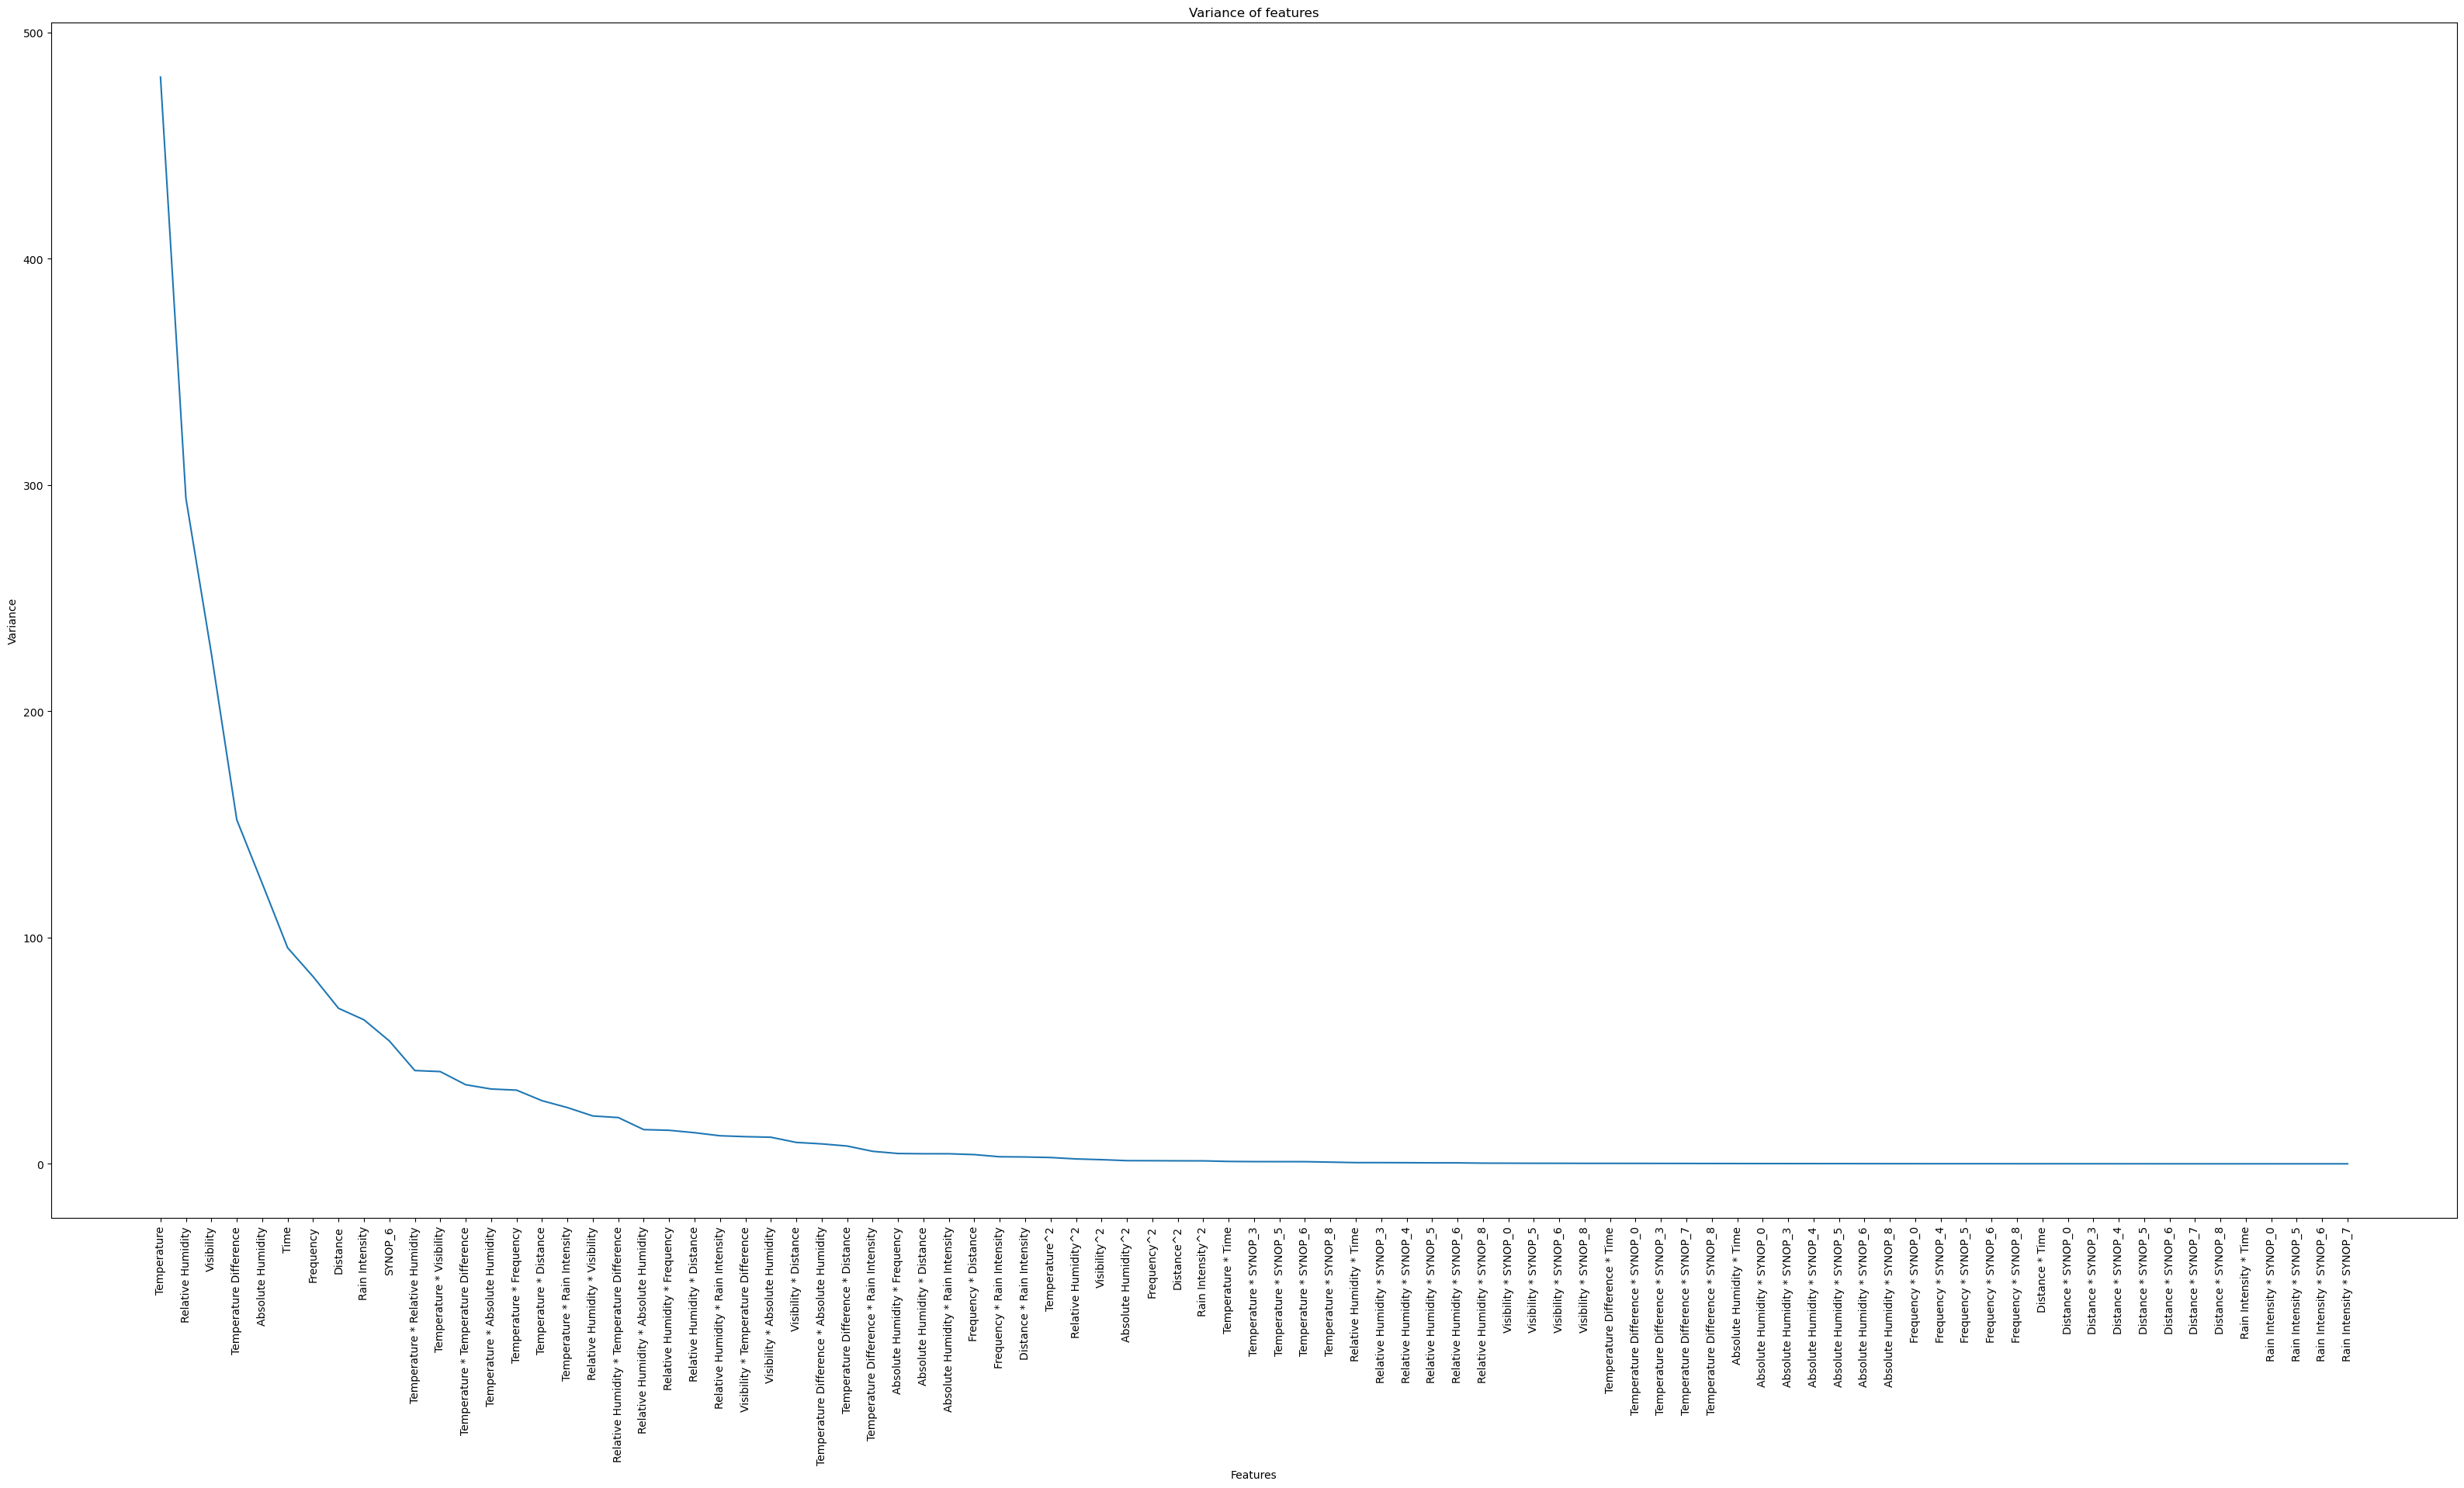

In [46]:
sorted_feature_variance = sorted(variance_multiplied, reverse = True)
plt.figure(figsize=(40, 20))
plt.plot(sorted_feature_variance)
plt.xlabel("Features")
plt.ylabel("Variance")
plt.xticks(range(len(sorted_feature_variance)), X_train.columns, rotation = 90)
# plt.yticks(sorted_feature_variance)
plt.title("Variance of features")
plt.savefig("./", dpi = 600, bbox_inches = "tight")
plt.show()

In [47]:
def feature_select_thresold(threshold):
    important_features = variance_multiplied > threshold
    important_features_indices = np.where(important_features)[0]
    print("-------------------------------------------------------------------------")
    print("Current threshold:", threshold)
    print("Current Number of features:", len(important_features_indices))
    # print("---------------------", "Trying Model with", len(important_features_indices), "features", "--------------------")
    # print(important_features_indices)
    train_set = X_train.iloc[:, important_features_indices]
    test_set = X_test.iloc[:, important_features_indices]
    
    # lr_interaction_pipe = Pipeline([("standard_scaler", StandardScaler()), 
    #                          ("regressor", LinearRegression())])
    
    lr_interaction_pipe = Pipeline([("regressor", LinearRegression())])
    
    lr_interaction_pipe.fit(train_set, y_train)
    train_mse = mean_squared_error(y_train, lr_interaction_pipe.predict(train_set))
    test_mse = mean_squared_error(y_test, lr_interaction_pipe.predict(test_set))
    train_r2 = r2_score(y_train, lr_interaction_pipe.predict(train_set))
    test_r2 = r2_score(y_test, lr_interaction_pipe.predict(test_set))

    return {"pipeline" : lr_interaction_pipe, "train_mse" : train_mse, "test_mse" : test_mse, "train_r2" : train_r2, "test_r2" : test_r2, "predictors" : len(important_features_indices)}

In [48]:
thresholds = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 20, 30, 40, 50]
train_mses = []
test_mses = []
train_r2s = []
test_r2s = []
n_features = []
for threshold in thresholds:
    result = feature_select_thresold(threshold)
    n_feature = result["predictors"]
    train_mse = result["train_mse"]
    test_mse = result["test_mse"]
    train_r2 = result["train_r2"]
    test_r2 = result["test_r2"]
    
    n_features.append(n_feature)
    train_mses.append(train_mse)
    test_mses.append(test_mse)
    train_r2s.append(train_r2)
    test_r2s.append(test_r2)
    
print("Thresholds: ", thresholds)
print("Number of features: ", n_features)
print("Train MSE: ", train_mses)
print("Test MSE: ", test_mses)
print("Train R2: ", train_r2s)
print("Test R2: ", test_r2s)

-------------------------------------------------------------------------
Current threshold: 0.0001
Current Number of features: 86
-------------------------------------------------------------------------
Current threshold: 0.0005
Current Number of features: 85
-------------------------------------------------------------------------
Current threshold: 0.001
Current Number of features: 84
-------------------------------------------------------------------------
Current threshold: 0.005
Current Number of features: 81
-------------------------------------------------------------------------
Current threshold: 0.01
Current Number of features: 80
-------------------------------------------------------------------------
Current threshold: 0.05
Current Number of features: 72
-------------------------------------------------------------------------
Current threshold: 0.1
Current Number of features: 65
-------------------------------------------------------------------------
Current threshold:

In [49]:
def visulize_thresold_result(thresholds, train_result, test_result, metric):
    fig, ax = plt.subplots(figsize = (20, 8))

    ax.plot(np.arange(len(thresholds)), train_result, label = f"train_{metric}", marker = 'o')
    ax.plot(np.arange(len(thresholds)), test_result, label = f"test_{metric}", marker = 'o')
    
    xticks = np.linspace(0, len(thresholds) - 1, len(thresholds))
    ax.set_xlabel("Threshold")
    ax.set_ylabel(metric)
    ax.set_xticks(xticks)
    ax.set_xticklabels(thresholds)
    ax.set_title(f"{metric} vs Threshold")

    ax.legend()
    plt.show()

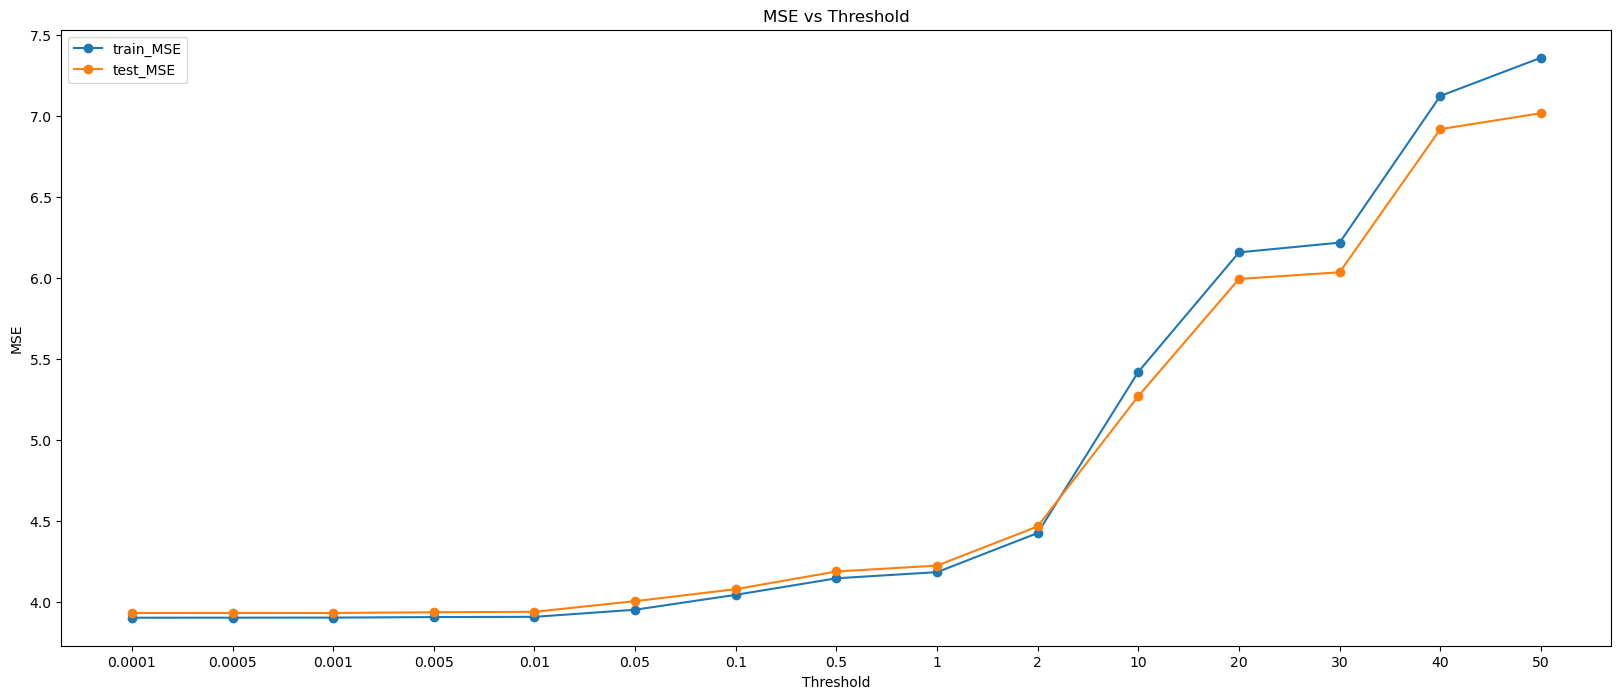

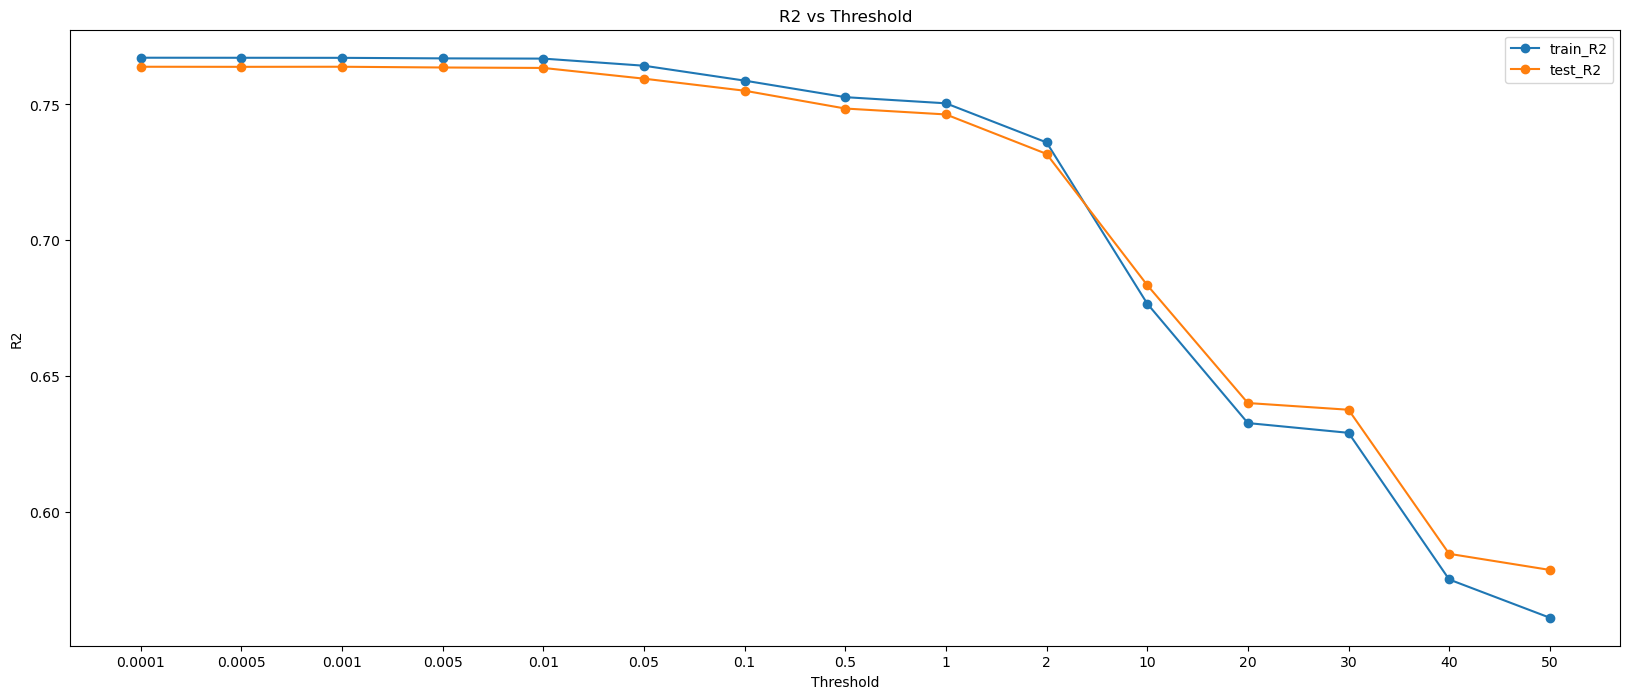

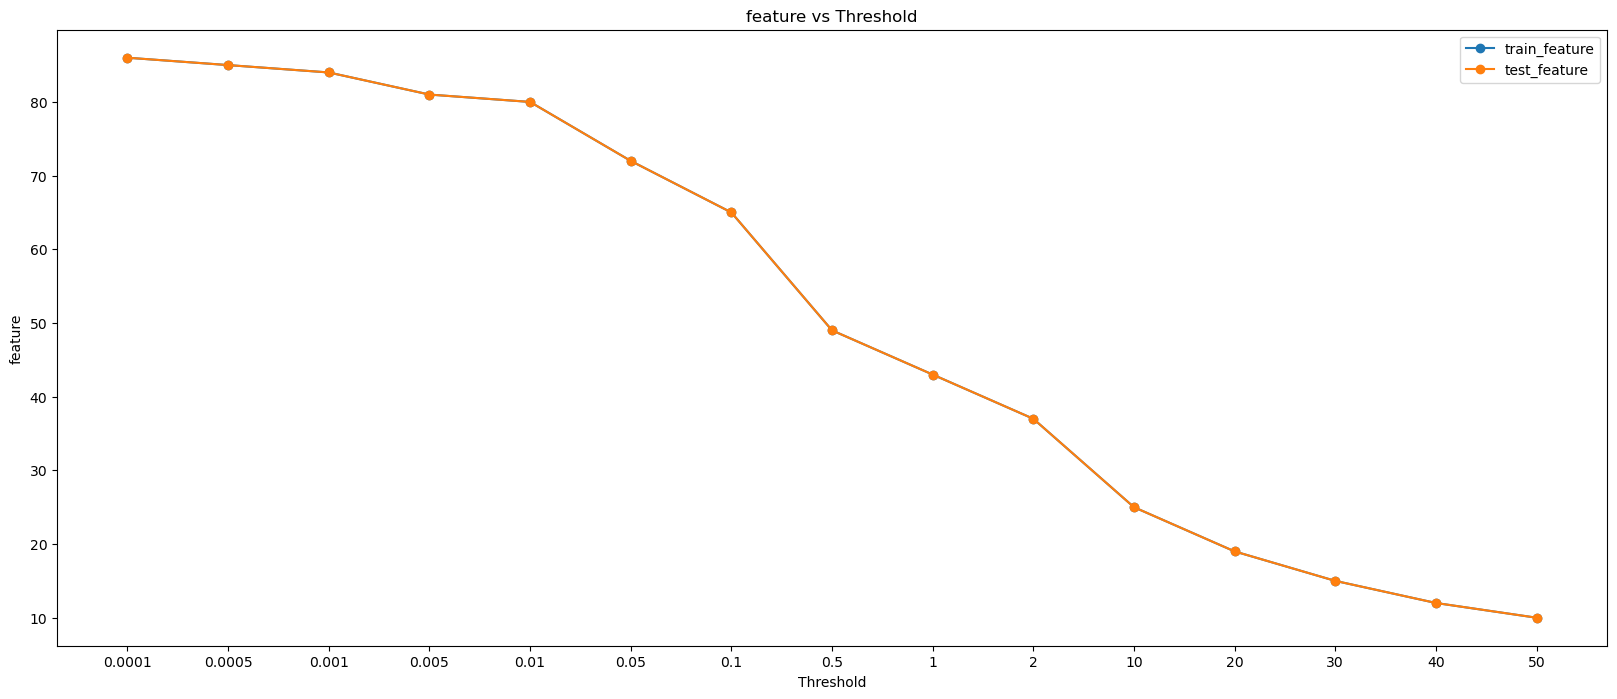

In [50]:
visulize_thresold_result(thresholds, train_mses, test_mses, "MSE")
visulize_thresold_result(thresholds, train_r2s, test_r2s, "R2")

visulize_thresold_result(thresholds, n_features, n_features, "feature")

In [51]:
result = feature_select_thresold(1)
print(result["train_mse"])
print(result["test_mse"])
print(result['train_r2'])
print(result['test_r2'])

-------------------------------------------------------------------------
Current threshold: 1
Current Number of features: 43
4.184729137707783
4.224974612685746
0.7504211760733344
0.7463258213863732


In [52]:
print_equation(result['pipeline']['regressor'], X_train)

y = 0.18800571478097763 * Temperature + 0.1672649016748874 * Relative Humidity + 5.416095861519143e-05 * Visibility + -2.15075167493338 * Temperature Difference + -0.015428649874751945 * Absolute Humidity + -2.183355796081012 * Time + -5.0118450169992474 * Frequency + 0.010422855084321555 * Distance + -8.888316933586987e-06 * Rain Intensity + -0.048656947795285656 * SYNOP_6 + 0.05272197391374206 * Temperature * Relative Humidity + -0.00015668870653139268 * Temperature * Visibility + 0.10876278607428781 * Temperature * Temperature Difference + -2.137130582732063e-06 * Temperature * Absolute Humidity + -0.012291001526618835 * Temperature * Frequency + 0.01177578380967715 * Temperature * Distance + -2.539179739909878e-05 * Temperature * Rain Intensity + 0.032726311112371446 * Relative Humidity * Visibility + 1.3744777263596309e-05 * Relative Humidity * Temperature Difference + -0.09117001802780632 * Relative Humidity * Absolute Humidity + 0.00046457488137274317 * Relative Humidity * Frequ

# Random Forest

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
import itertools
import statsmodels.api as sm
df = pd.read_csv("RFLData.csv")
for columns in df.columns:
    if "Unnamed" in columns:
        df.drop(columns, axis=1, inplace=True)
synop_onehot = pd.get_dummies(df["SYNOP Code"], prefix = "SYNOP")
df = pd.concat([df, synop_onehot], axis=1)
df = df.drop("SYNOP Code", axis=1)
df['Frequency'] = df['Frequency'] / 10000000000

/var/folders/k1/l4fpqgbn5hq_02pxbp2s7zkh0000gn/T/ipykernel_35909/2666675513.py:15: DtypeWarning: Columns (12,13,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("RFLData.csv")


In [54]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor()

lr_pipe = Pipeline([("regressor", regressor)])

train_set, test_set = train_test_split(df, test_size = 0.8, random_state = 42)

X_train = train_set.drop("RFL_Att", axis=1)
y_train = train_set["RFL_Att"]

X_test = test_set.drop("RFL_Att", axis=1)
y_test = test_set["RFL_Att"]


lr_pipe.fit(X_train, y_train)
train_mse = mean_squared_error(y_train, lr_pipe.predict(X_train))
test_mse = mean_squared_error(y_test, lr_pipe.predict(X_test))
train_r2 = r2_score(y_train, lr_pipe.predict(X_train))
test_r2 = r2_score(y_test, lr_pipe.predict(X_test))
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("Train R2:", train_r2)
print("Test R2:", test_r2)

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import GridSearchCV

regressor = RandomForestRegressor()

param_grid = {
    'n_estimators': [100, 200, 500],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
}


grid_search = GridSearchCV(regressor, param_grid, cv = 10, scoring = "neg_mean_squared_error", return_train_score = True)

grid_search.fit(X_train, y_train)


print("Best Parameters:", grid_search.best_params_)
print("Best MSE:", -grid_search.best_score_)



Best Parameters: {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Best MSE: 1.0053668302107444


In [ ]:
best_rf = RandomForestRegressor(**grid_search.best_params_, random_state=42)

best_rf.fit(X_train, y_train)

y_test_pred = best_rf.predict(X_test)

test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

y_train_pred = best_rf.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
print(f"Optimized TestMSE: {test_mse}")
print(f"Optimized Test R2: {test_r2}")
print(f"Optimized TrainMSE: {train_mse}")
print(f"Optimized Train R2: {train_r2}")

Optimized TestMSE: 0.8481867317413251
Optimized Test R2: 0.9492701898648203
Optimized TrainMSE: 0.13043829247323416
Optimized Train R2: 0.9922047215618446


In [ ]:
# random forest model fomula


y = 

AttributeError: 'RandomForestRegressor' object has no attribute 'coef_'

In [ ]:
best_rf.fit(X_train, y_train)

importances = best_rf.feature_importances_

feature_importances = pd.DataFrame({"feature": X_train.columns, "importance": importances})

features_importance = feature_importances.sort_values(by = "importance", ascending = False)

print(features_importance)

                   feature  importance
8           Rain Intensity    0.431569
0              Temperature    0.194031
7                 Distance    0.138494
4        Absolute Humidity    0.067170
2               Visibility    0.057901
9                  SYNOP_0    0.042086
1        Relative Humidity    0.024958
3   Temperature Difference    0.018819
5                     Time    0.012612
6                Frequency    0.010227
15                 SYNOP_8    0.000898
13                 SYNOP_6    0.000631
12                 SYNOP_5    0.000410
14                 SYNOP_7    0.000108
10                 SYNOP_3    0.000077
11                 SYNOP_4    0.000008


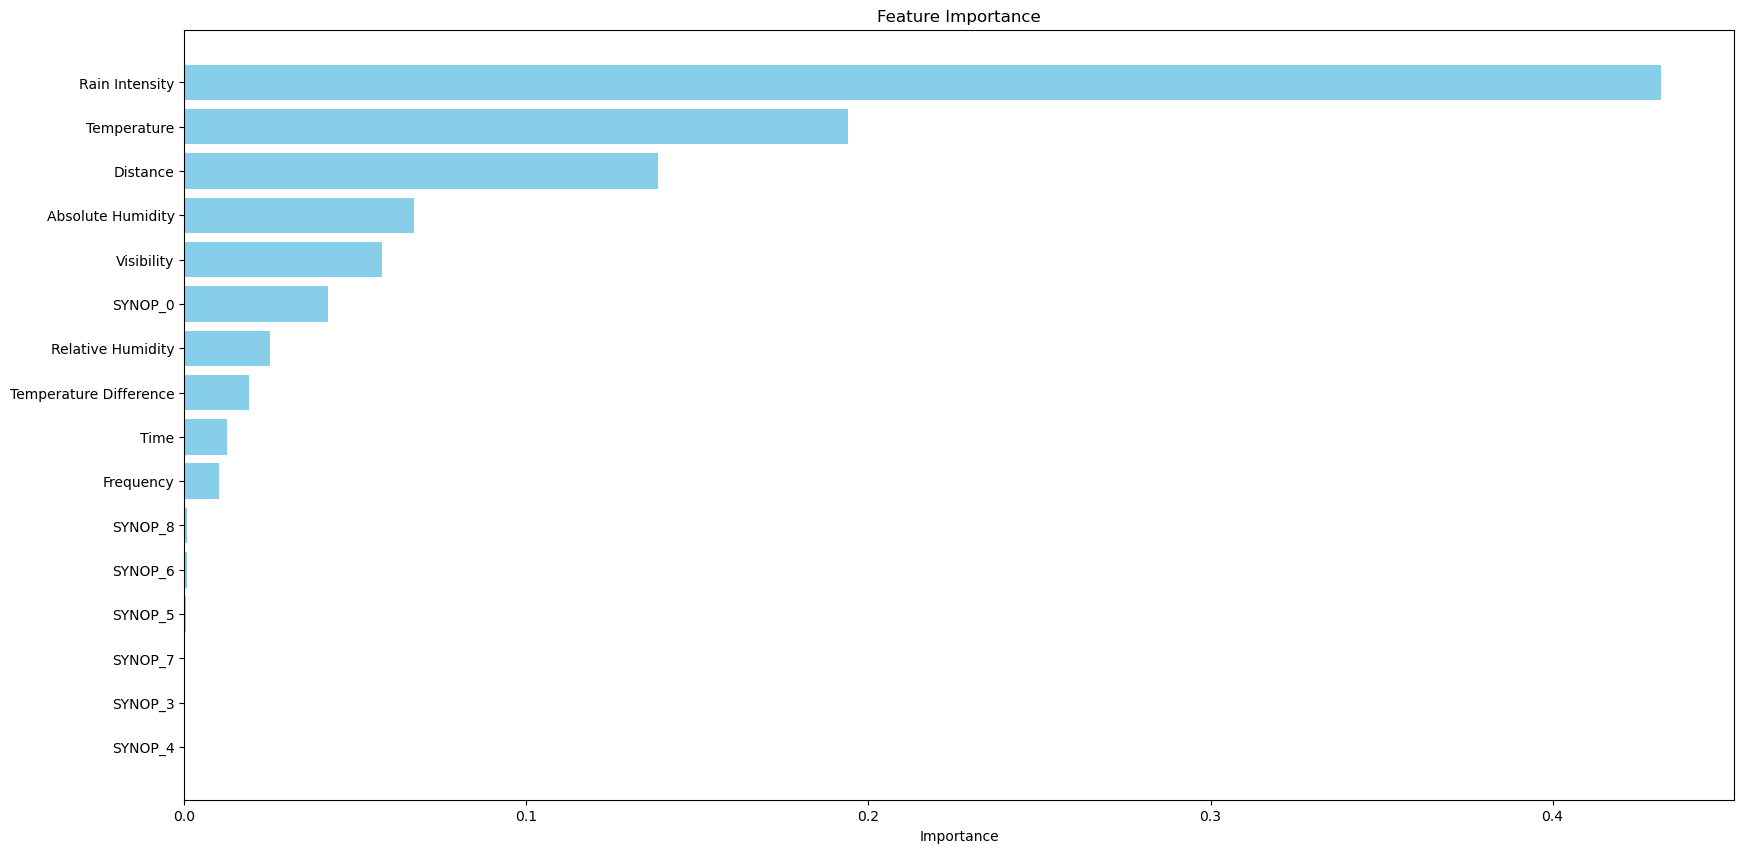

In [ ]:
plt.figure(figsize=(20, 10))
plt.barh(features_importance["feature"], features_importance["importance"], color = "skyblue")
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
important_features = features_importance[features_importance["importance"] > 0.01]["feature"].values
X_train = X_train[important_features]
X_test = X_test[important_features]

best_rf.fit(X_train, y_train)
print(mean_squared_error(y_train, best_rf.predict(X_train)))
print(mean_squared_error(y_test, best_rf.predict(X_test)))
print(r2_score(y_train, best_rf.predict(X_train)))
print(r2_score(y_test, best_rf.predict(X_test)))


KeyError: "['Temperature Difference', 'Time', 'Frequency'] not in index"